In [63]:
import bc_gh
import mod
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt 

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [64]:
# 基本参数
M1 = 4
M2 = 64
K1 = int(np.log2(M1))
K2 = int(np.log2(M2))

M = M1*M2
K = int(np.log2(M))

SNR1_dB = 5
SNR2_dB = 15

SNR1 = 10**(.1*SNR1_dB)
SNR2 = 10**(.1*SNR2_dB)

In [65]:
# 复合星座图（对应图中一个点）
symbols_composite_QAM, labels_composite_QAM = mod.grayQAM(M, True)
symbols_composite_APSK, labels_composite_APSK = mod.grayAPSK(np.array([32]*8), True)

In [66]:
# 复合星座图可达容量
tmp1 = bc_gh.awgn(symbols_composite_QAM*np.sqrt(SNR1), labels_composite_QAM, K1)
tmp2 = bc_gh.awgn(symbols_composite_QAM*np.sqrt(SNR2), labels_composite_QAM, -K2)
Rbc_QAM_composite = tmp1.sum()
Ruc_QAM_composite = tmp2.sum()

tmp1 = bc_gh.awgn(symbols_composite_APSK*np.sqrt(SNR1), labels_composite_APSK, K1)
tmp2 = bc_gh.awgn(symbols_composite_APSK*np.sqrt(SNR2), labels_composite_APSK, -K2)
Rbc_APSK_composite = tmp1.sum()
Ruc_APSK_composite = tmp2.sum()

In [67]:
# CL和EL子星座图
symbols_CL, labels_CL = mod.grayQAM(M1, True)
symbols_EL_QAM, labels_EL_QAM = mod.grayQAM(M2, True)
symbols_EL_APSK, labels_EL_APSK = mod.grayAPSK(np.array([16]*4), True)

In [68]:
alpha_vec = np.arange(0, 1.05, 0.05)

Rbc_QAM_type1 = np.zeros(len(alpha_vec))
Ruc_QAM_type1 = np.zeros(len(alpha_vec))
Rbc_APSK_type1 = np.zeros(len(alpha_vec))
Ruc_APSK_type1 = np.zeros(len(alpha_vec))
# Rbc_APSK_1quad_type1 = np.zeros(len(alpha_vec))
# Ruc_APSK_1quad_type1 = np.zeros(len(alpha_vec))

Rbc_QAM_type2 = np.zeros(len(alpha_vec))
Ruc_QAM_type2 = np.zeros(len(alpha_vec))
Rbc_APSK_type2 = np.zeros(len(alpha_vec))
Ruc_APSK_type2 = np.zeros(len(alpha_vec))
Rbc_APSK_1quad_type2 = np.zeros(len(alpha_vec))
Ruc_APSK_1quad_type2 = np.zeros(len(alpha_vec))

In [69]:
MUSTtype = 1
for i in tqdm(range(len(alpha_vec))):
    
    alpha = alpha_vec[i]
    symbols_QAM, labels_QAM = mod.MUST(symbols_CL, symbols_EL_QAM, labels_CL, labels_EL_QAM, 1-alpha, alpha, MUSTtype)
    symbols_APSK, labels_APSK = mod.MUST(symbols_CL, symbols_EL_APSK, labels_CL, labels_EL_APSK, 1-alpha, alpha, MUSTtype)

    tmp1_QAM = bc_gh.awgn(symbols_QAM*np.sqrt(SNR1), labels_QAM, K1)
    tmp1_APSK = bc_gh.awgn(symbols_APSK*np.sqrt(SNR1), labels_APSK, K1)

    Rbc_QAM_type1[i] = tmp1_QAM.sum()
    Rbc_APSK_type1[i] = tmp1_APSK.sum()
    
    tmp2_QAM = bc_gh.awgn(symbols_QAM*np.sqrt(SNR2), labels_QAM, -K2)
    tmp2_APSK = bc_gh.awgn(symbols_APSK*np.sqrt(SNR2), labels_APSK, -K2)

    Ruc_QAM_type1[i] = tmp2_QAM.sum()
    Ruc_APSK_type1[i] = tmp2_APSK.sum()

100%|██████████| 21/21 [00:04<00:00,  4.56it/s]


In [70]:
MUSTtype = 2
for i in tqdm(range(len(alpha_vec))):
    
    alpha = alpha_vec[i]
    symbols_QAM, labels_QAM = mod.MUST(symbols_CL, symbols_EL_QAM, labels_CL, labels_EL_QAM, 1-alpha, alpha, MUSTtype)
    symbols_APSK, labels_APSK = mod.MUST(symbols_CL, symbols_EL_APSK, labels_CL, labels_EL_APSK, 1-alpha, alpha, MUSTtype)

    tmp1_QAM = bc_gh.awgn(symbols_QAM*np.sqrt(SNR1), labels_QAM, K1)
    tmp1_APSK = bc_gh.awgn(symbols_APSK*np.sqrt(SNR1), labels_APSK, K1)

    Rbc_QAM_type2[i] = tmp1_QAM.sum()
    Rbc_APSK_type2[i] = tmp1_APSK.sum()
    
    tmp2_QAM = bc_gh.awgn(symbols_QAM*np.sqrt(SNR2), labels_QAM, -K2)
    tmp2_APSK = bc_gh.awgn(symbols_APSK*np.sqrt(SNR2), labels_APSK, -K2)

    Ruc_QAM_type2[i] = tmp2_QAM.sum()
    Ruc_APSK_type2[i] = tmp2_APSK.sum()

100%|██████████| 21/21 [00:05<00:00,  4.18it/s]


In [71]:
# alpha = 0.3446300978987599
# MUSTtype = 2
# symbols = np.zeros((4, M2), dtype=complex)
# labels = np.zeros((4, M2), dtype=np.int32)

# for i in range(4):
#     symbols_CL_quad, labels_CL_quad = mod.getConsteQuad(symbols_CL, labels_CL, i+1)
#     symbols_EL_quad, labels_EL_quad = mod.getConsteQuad(symbols_composite_APSK, labels_composite_APSK, i+1)
#     symbols_EL_quad = symbols_EL_quad-symbols_EL_quad.mean()
#     symbols_quad, labels_quad = mod.MUST(symbols_CL_quad, symbols_EL_quad, labels_CL_quad, labels_EL_quad, 1-alpha, alpha, MUSTtype, True)
#     labels_quad += M2*(i^(i>>1))
#     symbols[i, :] = symbols_quad.squeeze()
#     labels[i, :] = labels_quad.squeeze()

# symbols = symbols.reshape((M, 1))
# labels = labels.reshape((M, 1))
# mod.showConsteDiagram(symbols, labels)
# plt.scatter(symbols.real, symbols.imag)
# plt.scatter(symbols_composite_APSK.real, symbols_composite_APSK.imag)


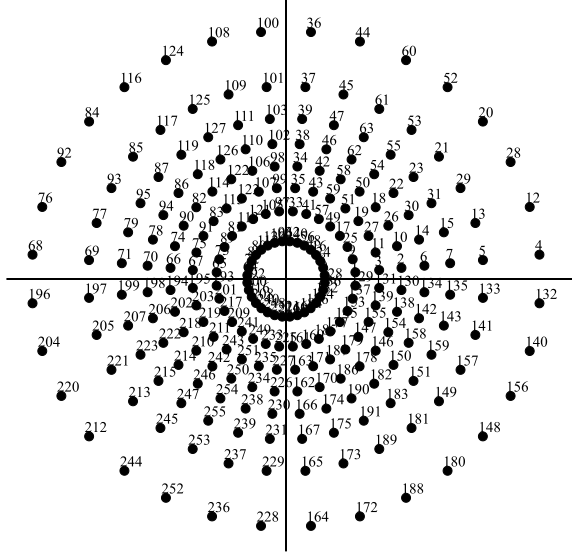

In [72]:
# plt.scatter(symbols.real, symbols.imag)
# # plt.scatter(symbols_composite_APSK.real, symbols_composite_APSK.imag)
# plt.axis('equal')
mod.showConsteDiagram(symbols_composite_APSK, labels_composite_APSK)

In [77]:
for i in tqdm(range(len(alpha_vec))):

    alpha = alpha_vec[i]
    symbols = np.zeros((4, M2), dtype=complex)
    labels = np.zeros((4, M2), dtype=np.int32)
    MUSTtype = 2

    for j in range(4):
        symbols_CL_quad, labels_CL_quad = mod.getConsteQuad(symbols_CL, labels_CL, j+1)
        symbols_EL_quad, labels_EL_quad = mod.getConsteQuad(symbols_composite_APSK, labels_composite_APSK, j+1)
        symbols_EL_quad = symbols_EL_quad-symbols_EL_quad.mean()
        symbols_quad, labels_quad = mod.MUST(symbols_CL_quad, symbols_EL_quad, labels_CL_quad, labels_EL_quad, 1-alpha, alpha, MUSTtype, True)
        labels_quad += M2*(j^(j>>1))
        symbols[j, :] = symbols_quad.squeeze()
        labels[j, :] = labels_quad.squeeze()

    symbols = symbols.reshape((M, 1))
    labels = labels.reshape((M, 1))

    tmp1 = bc_gh.awgn(symbols*np.sqrt(SNR1), labels, K1)
    tmp2 = bc_gh.awgn(symbols*np.sqrt(SNR2), labels, -K2)

    Rbc_APSK_1quad_type2[i] = tmp1.sum()
    Ruc_APSK_1quad_type2[i] = tmp2.sum()

100%|██████████| 21/21 [00:02<00:00,  7.46it/s]


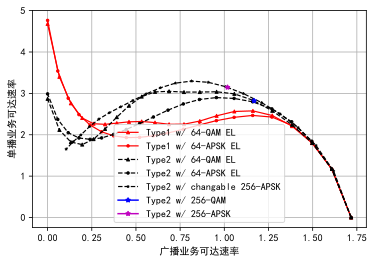

In [78]:
fig = plt.figure()

#解决中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False 
plt.grid()

plt.plot(Rbc_QAM_type1, Ruc_QAM_type1, linewidth=1.2, marker='^', markersize=3, linestyle='-', color='r')
plt.plot(Rbc_APSK_type1, Ruc_APSK_type1, linewidth=1.2, marker='.', markersize=5, linestyle='-', color='r')
# plt.plot(Rbc_APSK_1quad_type1, Ruc_APSK_1quad_type1, linewidth=1.2, marker=(5, 2), markersize=3, linestyle='-', color='r')

plt.plot(Rbc_QAM_type2, Ruc_QAM_type2, linewidth=1.2, marker='^', markersize=3, linestyle='--', color='k')
plt.plot(Rbc_APSK_type2, Ruc_APSK_type2, linewidth=1.2, marker='.', markersize=5, linestyle='--', color='k')
plt.plot(Rbc_APSK_1quad_type2, Ruc_APSK_1quad_type2, linewidth=1.2, marker=(5, 2), markersize=3, linestyle='--', color='k')

plt.plot(Rbc_QAM_composite, Ruc_QAM_composite, marker=(5, 1), markersize=5, color='b')
plt.plot(Rbc_APSK_composite, Ruc_APSK_composite, marker=(5, 1), markersize=5, color='m')

plt.xlabel("广播业务可达速率")
plt.ylabel("单播业务可达速率")

plt.legend(["Type1 w/ 64-QAM EL", "Type1 w/ 64-APSK EL", "Type2 w/ 64-QAM EL", "Type2 w/ 64-APSK EL", "Type2 w/ changable 256-APSK", "Type2 w/ 256-QAM", "Type2 w/ 256-APSK"])